In [1]:
# Load data and set pandas options to display the full dataset if needed
import re
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  
restaurant_data = pd.read_csv('../Data/restaurants.tsv', sep='\t')
restaurant_data = restaurant_data.set_index(['id'], drop=False)
restaurant_data.head()

,id,name,address,city,phone,type
id,,,,,,
1,1,arnie morton's of chicago,435 s. la cienega blv.,los angeles,310/246-1501,american
2,2,arnie morton's of chicago,435 s. la cienega blvd.,los angeles,310-246-1501,steakhouses
3,3,art's delicatessen,12224 ventura blvd.,studio city,818/762-1221,american
4,4,art's deli,12224 ventura blvd.,studio city,818-762-1221,delis
5,5,hotel bel-air,701 stone canyon rd.,bel air,310/472-1211,californian


In [2]:
# Get info about the data and datatypes of the DataFrame
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1 to 864
Data columns (total 6 columns):
id         864 non-null int64
name       864 non-null object
address    864 non-null object
city       864 non-null object
phone      864 non-null object
type       863 non-null object
dtypes: int64(1), object(5)
memory usage: 47.2+ KB


In [3]:
# Remove special characters from phone, address, name and city to detect duplicates
restaurant_data.phone = restaurant_data.phone.map(lambda x: re.sub(r'\W+', '', x))
restaurant_data.address = restaurant_data.address.map(lambda x: re.sub(r'[^a-zA-Z0-9 ]+', '', x))
restaurant_data.name = restaurant_data.name.map(lambda x: re.sub(r'[^a-zA-Z0-9 ]+', '', x))
restaurant_data.city = restaurant_data.city.map(lambda x: re.sub(r'[^a-zA-Z0-9 ]+', '', x))

In [4]:
# Check the unique values of city
restaurant_data.city.unique()

array(['los angeles', 'studio city', 'bel air', 'sherman oaks',
       'santa monica', 'hollywood', 'w hollywood', 'malibu',
       'beverly hills', 'los feliz', 'chinatown', 'pasadena', 'new york',
       'new york city', 'brooklyn', 'las vegas', 'atlanta',
       'san francisco', 'pacific palisades', 'toluca lake', 'west la',
       'westlake village', 'northridge', 'mar vista', 'venice', 'la',
       'redondo beach', 'westwood', 'culver city', 'long beach',
       'century city', 'st boyle hts', 'rancho park', 'st hermosa beach',
       'marina del rey', 'encino', 'monterey park', 'burbank',
       'seal beach', 'brentwood', 'manhattan beach', 'glendale', 'queens',
       'marietta', 'roswell', 'smyrna', 'duluth', 'decatur',
       'college park'], dtype=object)

In [5]:
# Map multiple occurrences of the same city in different writing
# It could also be a good idea to map all city parts to one city (i.e. hollywood -> los angeles)
city_map = {'la': 'los angeles', 'new york city': 'new york', 'west la': 'los angeles', 'w hollywood': 'hollywood'}
restaurant_data.city = restaurant_data.city.replace(city_map)
restaurant_data.city.sort_values().unique()

array(['atlanta', 'bel air', 'beverly hills', 'brentwood', 'brooklyn',
       'burbank', 'century city', 'chinatown', 'college park',
       'culver city', 'decatur', 'duluth', 'encino', 'glendale',
       'hollywood', 'las vegas', 'long beach', 'los angeles', 'los feliz',
       'malibu', 'manhattan beach', 'mar vista', 'marietta',
       'marina del rey', 'monterey park', 'new york', 'northridge',
       'pacific palisades', 'pasadena', 'queens', 'rancho park',
       'redondo beach', 'roswell', 'san francisco', 'santa monica',
       'seal beach', 'sherman oaks', 'smyrna', 'st boyle hts',
       'st hermosa beach', 'studio city', 'toluca lake', 'venice',
       'westlake village', 'westwood'], dtype=object)

In [6]:
# Remove unnecessary explaination parts from the address string for a more accurate duplicate detection
restaurant_data['address_cleared'] = restaurant_data['address'].str.split(r' between| off| near| at| in').str[0]

In [7]:
# Print the new and old address to ensure that there was an improvement in the data quality
restaurant_data[['address_cleared', 'address', 'city']].head(20)

,address_cleared,address,city
id,,,
1,435 s la cienega blv,435 s la cienega blv,los angeles
2,435 s la cienega blvd,435 s la cienega blvd,los angeles
3,12224 ventura blvd,12224 ventura blvd,studio city
4,12224 ventura blvd,12224 ventura blvd,studio city
5,701 stone canyon rd,701 stone canyon rd,bel air
6,701 stone canyon rd,701 stone canyon rd,bel air
7,14016 ventura blvd,14016 ventura blvd,sherman oaks
8,14016 ventura blvd,14016 ventura blvd,sherman oaks
9,624 s la brea ave,624 s la brea ave,los angeles


In [8]:
# Overwrite address and remove address_cleared for a more consistent dataframe
restaurant_data.address = restaurant_data.address_cleared
restaurant_data = restaurant_data.drop(['address_cleared'], axis=1)

In [9]:
# Remove appendixes of numbers because they are inconsistent over the dataset
restaurant_data.address = restaurant_data.address.map(lambda x: re.sub(r"(?<=\d)(st|nd|rd|th)\b", '', x))

In [10]:
# Remove the direction in address and name because it's inconsistent over the dataset
restaurant_data.address = restaurant_data.address.map(lambda x: re.sub('(( |^)((south)|(east)|(west)|(north)|(ne)|(se)|(nw)|(sw)|s|w|e|n)( |$))', ' ', x))
restaurant_data.name = restaurant_data.name.map(lambda x: re.sub('(( |^)((south)|(east)|(west)|(north)|(ne)|(se)|(nw)|(sw)|s|w|e|n)( |$))', ' ', x))

In [11]:
# Standardize the address even more
address_num_map = {'first': '1', 'second': '2', 'third': '3', 'fourth': '4', 'fifth': '5', 'sixth': '6',
                   'seventh': '7','eighth' : '8', 'ninth': '9', 'tenth': '10', 'eleventh': '11', 'twelfth': '12'}
address_name_map = {'la': 'los angeles', 'ave': 'avenue',  'rd': 'road', 'blv': 'boulevard', 
                    'blvd': 'boulevard', 'st': 'street'}
address_map = {**address_name_map, **address_num_map}
restaurant_data.address = restaurant_data.address.map(lambda x: ' '.join([address_map.get(i, i) for i in x.split()]))

In [12]:
#Check for the duplicates in the four important columns in our dataset
print('Duplicates in address, city and phone' + str(restaurant_data.duplicated(subset=['address', 'city', 'phone']).sum()))
print('Duplicates in name city and phone' + str(restaurant_data.duplicated(subset=['name', 'city', 'phone']).sum()))
print('Duplicates in address name and phone: ' + str(restaurant_data.duplicated(subset=['address', 'name', 'phone']).sum()))
print('Duplicates in address city and name: ' + str(restaurant_data.duplicated(subset=['address', 'city', 'name']).sum()))
print('Duplicates in address, city, name and phone: ' + str(restaurant_data.duplicated(subset=['address', 'city', 'name', 'phone']).sum()))

Duplicates in address, city and phone94
Duplicates in name city and phone78
Duplicates in address name and phone: 67
Duplicates in address city and name: 67
Duplicates in address, city, name and phone: 65


In [13]:
# Get a Series of all duplicate entries 
duplicates_bool_1 = restaurant_data.duplicated(subset=['address', 'city', 'phone'])
duplicates_bool_2 = restaurant_data.duplicated(subset=['address', 'name', 'phone'])
duplicates_bool_3 = restaurant_data.duplicated(subset=['address', 'city', 'name'])
duplicates_bool_4 = restaurant_data.duplicated(subset=['name', 'city', 'phone'])
duplicates_bool = duplicates_bool_1 | duplicates_bool_2 | duplicates_bool_3 | duplicates_bool_4

In [14]:
# Select all duplicates into a new Dataframe
restaurant_duplicates = restaurant_data[duplicates_bool == True]
len(restaurant_duplicates)

111

In [15]:
restaurant_duplicates.head(20)

,id,name,address,city,phone,type
id,,,,,,
2,2,arnie mortons of chicago,435 los angeles cienega boulevard,los angeles,3102461501,steakhouses
4,4,arts deli,12224 ventura boulevard,studio city,8187621221,delis
6,6,belair hotel,701 stone canyon road,bel air,3104721211,californian
8,8,cafe bizou,14016 ventura boulevard,sherman oaks,8187883536,french bistro
10,10,campanile,624 los angeles brea avenue,los angeles,2139381447,californian
12,12,chinois on main,2709 main street,santa monica,3103929025,pacific new wave
14,14,citrus,6703 melrose avenue,los angeles,2138570034,californian
16,16,fenix at the argyle,8358 sunset boulevard,hollywood,2138486677,french (new)
18,18,granita,23725 malibu road,malibu,3104560488,californian


In [16]:
# Check the dataset without duplicates
restaurant_data[restaurant_data['id'].isin(restaurant_duplicates['id'])== False].head(20)

,id,name,address,city,phone,type
id,,,,,,
1,1,arnie mortons of chicago,435 los angeles cienega boulevard,los angeles,3102461501,american
3,3,arts delicatessen,12224 ventura boulevard,studio city,8187621221,american
5,5,hotel belair,701 stone canyon road,bel air,3104721211,californian
7,7,cafe bizou,14016 ventura boulevard,sherman oaks,8187883536,french
9,9,campanile,624 los angeles brea avenue,los angeles,2139381447,american
11,11,chinois on main,2709 main street,santa monica,3103929025,french
13,13,citrus,6703 melrose avenue,los angeles,2138570034,californian
15,15,fenix,8358 sunset boulevard,hollywood,2138486677,american
17,17,granita,23725 malibu road,malibu,3104560488,californian


In [17]:
# Load the gold standard duplicates
restaurant_real_duplicates = pd.read_csv('../Data/restaurants_DPL.tsv', sep='\t')

In [39]:
# Check the quality of the duplicate detection
restaurant_data_count = len(restaurant_data)
my_duplicate_ids = restaurant_duplicates['id']
my_duplicate_count = len(my_duplicate_ids)
real_duplicates_count = len(restaurant_real_duplicates)
true_positives_count = len(my_duplicate_ids[my_duplicate_ids.isin(restaurant_real_duplicates.id2)])
false_positives_count = len(my_duplicate_ids[my_duplicate_ids.isin(restaurant_real_duplicates.id2) == False])
false_negatives = real_duplicates_count - true_positives_count
precision = true_positives_count / my_duplicate_count
recall = true_positives_count / (true_positives_count + false_negatives)

true_negatives = restaurant_data_count - real_duplicates_count - false_positives_count

print('All entries in original dataset: ' + str(restaurant_data_count))
print('Detected duplicates (all): ' + str(my_duplicate_count))
print('Real duplicates (from gold standard): ' + str(real_duplicates_count))
print('True positives: ' +  str(true_positives_count))
print('True negatives: ' +  str(true_negatives))
print('False positives: ' + str(false_positives_count))
print('False negatives: ' + str(false_negatives))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))

All entries in original dataset: 864
Detected duplicates (all): 111
Real duplicates (from gold standard): 112
True positives: 103
True negatives: 744
False positives: 8
False negatives: 9
Precision: 0.9279279279279279
Recall: 0.9196428571428571


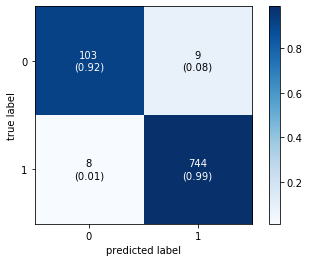

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

binary = np.array([[true_positives_count, false_negatives],
                   [false_positives_count, true_negatives]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [28]:
d'uplicate_indices = {}
duplicates_str_1 = ['address', 'city', 'phone']
duplicates_str_2 = ['address', 'name', 'phone']
duplicates_str_3 = ['address', 'city', 'name']
duplicates_str_4 = ['name', 'city', 'phone']

for row1_idx, row1 in restaurant_data.iterrows(): 
    cur_index = str(row1_idx)
    duplicate_indices[cur_index] = []
    row_1_imp_cols_1 = row1[duplicates_str_1]
    row_1_imp_cols_2 = row1[duplicates_str_2]
    row_1_imp_cols_3 = row1[duplicates_str_3]
    row_1_imp_cols_4 = row1[duplicates_str_4]
    for row2 in range(row1_idx + 1, len(restaurant_data)):
        row_2_imp_cols_1 = restaurant_data.loc[row2, duplicates_str_1]
        row_2_imp_cols_2 = restaurant_data.loc[row2, duplicates_str_2]
        row_2_imp_cols_3 = restaurant_data.loc[row2, duplicates_str_3]
        row_2_imp_cols_4 = restaurant_data.loc[row2, duplicates_str_4]
        if (row_1_imp_cols_1.equals(row_2_imp_cols_1) or 
                row_1_imp_cols_2.equals(row_2_imp_cols_2) or    
                row_1_imp_cols_3.equals(row_2_imp_cols_3) or 
                row_1_imp_cols_4.equals(row_2_imp_cols_4)):
                    duplicate_indices[cur_index].append(row2)
                    print('dup found')

dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found
dup found


In [29]:
duplicate_indices


{'1': [2],
 '2': [],
 '3': [4],
 '4': [],
 '5': [6],
 '6': [],
 '7': [8],
 '8': [],
 '9': [10],
 '10': [],
 '11': [12],
 '12': [],
 '13': [14],
 '14': [],
 '15': [16],
 '16': [],
 '17': [18],
 '18': [],
 '19': [],
 '20': [],
 '21': [],
 '22': [],
 '23': [24],
 '24': [],
 '25': [26],
 '26': [],
 '27': [28],
 '28': [],
 '29': [30],
 '30': [],
 '31': [],
 '32': [],
 '33': [34],
 '34': [],
 '35': [],
 '36': [],
 '37': [38],
 '38': [],
 '39': [40],
 '40': [],
 '41': [],
 '42': [],
 '43': [44],
 '44': [],
 '45': [],
 '46': [],
 '47': [48],
 '48': [],
 '49': [50],
 '50': [],
 '51': [52],
 '52': [],
 '53': [54],
 '54': [],
 '55': [56],
 '56': [],
 '57': [58],
 '58': [],
 '59': [60],
 '60': [],
 '61': [62],
 '62': [],
 '63': [64],
 '64': [],
 '65': [66],
 '66': [],
 '67': [68],
 '68': [],
 '69': [70],
 '70': [],
 '71': [72],
 '72': [],
 '73': [74],
 '74': [],
 '75': [76],
 '76': [],
 '77': [78],
 '78': [],
 '79': [80],
 '80': [],
 '81': [82],
 '82': [],
 '83': [84],
 '84': [],
 '85': [86],
 '86

In [32]:
restaurant_data.loc[[555, 553, 784]]


,id,name,address,city,phone,type
id,,,,,,
555,555,lillie langtrys,129 fremont street,las vegas,7023857111,asian
553,553,golden nugget hotel,129 fremont street,las vegas,7023857111,buffets
784,784,stefanos,129 fremont street,las vegas,7023857111,italian
